In [1]:
import pandas as pd
import seaborn as sb
import math
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/Portugal_Dataset.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Functions:

In [2]:
def remove_outliers(df):
    df = df[df['FFMC'] != 18.7]
    df = df[df['ISI'] != 56.1]
    df = df[df['rain'] != 6.4]
    df = df[df['area'] != 746.28]
    df = df[df['area'] != 1090.84]
    return df

In [3]:
# https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
def histexploration(feature):
    min_val = df[feature].min()
    max_val = df[feature].max()
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    n_term = len(df[feature])**(0.33)
    binwidth = 2 * IQR / n_term
    if binwidth == 0:
        binwidth = 0.1
    n_bins = (max_val - min_val) / binwidth
    n_bins = math.ceil(n_bins)
    df[feature].hist(bins=n_bins)

In [4]:
def month_to_season(df):
    df.loc[(df['month'] == 'jan'), 'season'] = 'winter'
    df.loc[(df['month'] == 'feb'), 'season'] = 'winter'
    df.loc[(df['month'] == 'mar'), 'season'] = 'spring'
    df.loc[(df['month'] == 'apr'), 'season'] = 'spring'
    df.loc[(df['month'] == 'may'), 'season'] = 'spring'
    df.loc[(df['month'] == 'jun'), 'season'] = 'summer'
    df.loc[(df['month'] == 'jul'), 'season'] = 'summer'
    df.loc[(df['month'] == 'aug'), 'season'] = 'summer'
    df.loc[(df['month'] == 'sep'), 'season'] = 'fall'
    df.loc[(df['month'] == 'oct'), 'season'] = 'fall'
    df.loc[(df['month'] == 'nov'), 'season'] = 'fall'
    df.loc[(df['month'] == 'dec'), 'season'] = 'winter'
    df = df.drop(['month'], 1)
    return df

In [5]:
def day_to_timeframe(df):
    df.loc[(df['day'] == 'mon'), 'timeframe'] = 'weekday'
    df.loc[(df['day'] == 'tue'), 'timeframe'] = 'weekday'
    df.loc[(df['day'] == 'wed'), 'timeframe'] = 'weekday'
    df.loc[(df['day'] == 'thu'), 'timeframe'] = 'weekday'
    df.loc[(df['day'] == 'fri'), 'timeframe'] = 'weekday'
    df.loc[(df['day'] == 'sat'), 'timeframe'] = 'weekend'
    df.loc[(df['day'] == 'sun'), 'timeframe'] = 'weekend'
    df = df.drop(['day'], 1)
    return df

In [6]:
def encode_month_or_season(df):
    if 'month' in df.columns:
        enc_df = pd.get_dummies(df['month'])
        df = pd.merge(df, enc_df, right_index=True, left_index=True)
        df = df.drop(['month'], 1)
        
    elif 'season' in df.columns:
        enc_df = pd.get_dummies(df['season'])
        df = pd.merge(df, enc_df, right_index=True, left_index=True)
        df = df.drop(['season'], 1)
        
    return df

In [7]:
def encode_day_or_timeframe(df):
    if 'day' in df.columns:
        enc_df = pd.get_dummies(df['day'])
        df = pd.merge(df, enc_df, right_index=True, left_index=True)
        df = df.drop(['day'], 1)
        
    elif 'timeframe' in df.columns:
        enc_df = pd.get_dummies(df['timeframe'])
        df = pd.merge(df, enc_df, right_index=True, left_index=True)
        df = df.drop(['timeframe'], 1)
        
    return df

In [8]:
# all values between 0 and 1
def normalize_data(df):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    numeric_cols.remove('area')
    minmax = MinMaxScaler()
    df[numeric_cols] = minmax.fit_transform(df[numeric_cols])
    return df

In [9]:
# mean value is 0, standard deviation is 1
def standardize_data(df):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    numeric_cols.remove('area')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

# EDA:

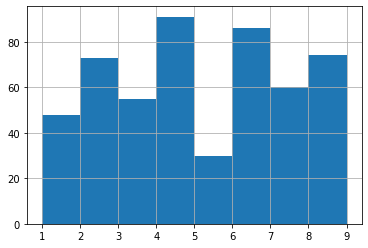

In [10]:
histexploration('X')

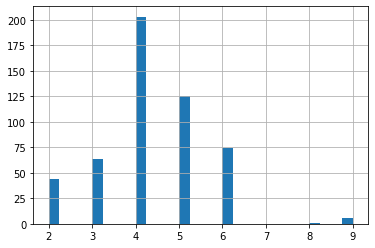

In [11]:
histexploration('Y')

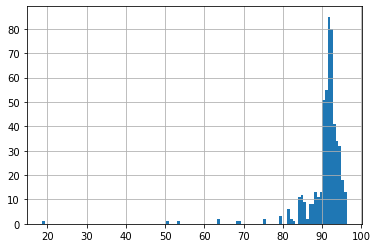

In [12]:
histexploration('FFMC')

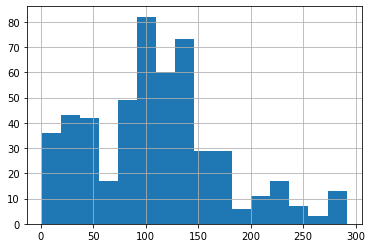

In [13]:
histexploration('DMC')

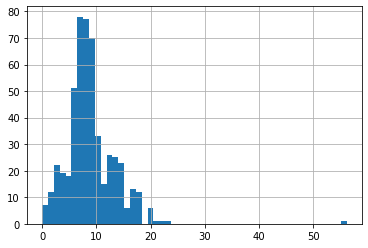

In [14]:
histexploration('ISI')

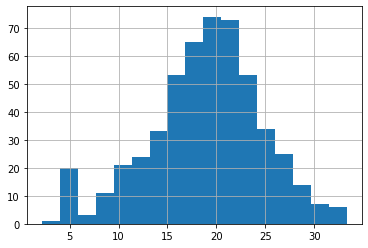

In [15]:
histexploration('temp')

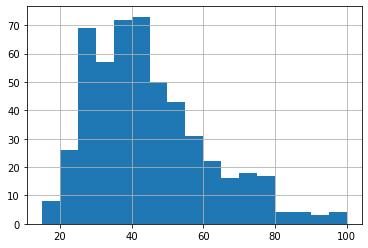

In [16]:
histexploration('RH')

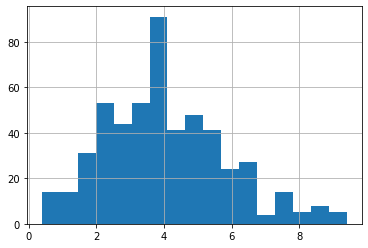

In [17]:
histexploration('wind')

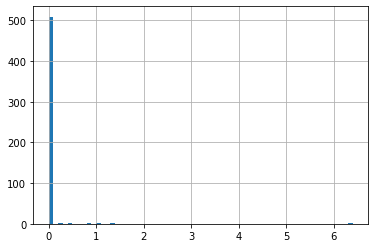

In [18]:
histexploration('rain')

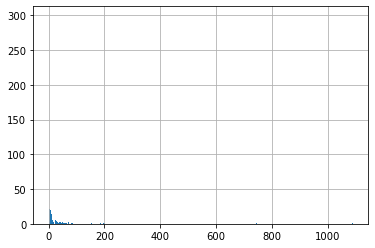

In [19]:
histexploration('area')

It looks like there is  
a really low value for FFMC,  
a really high value for ISI,  
a really high value for rain,  
and 1-2 really high values for area.

Let's remove those samples.

**Ideas for preprocessing:**
- remove outliers **check**
- convert month into season (dec/jan/feb = winter, mar/april/may = spring, etc.) **check**
- convert day into weekday/weekend (mon/tue/wed/thu/fri = 0, sat/sun = 1) **check**
- drop some columns (either before training or trying out different combinations during training)
- encode month/day **check**
- standardize/normalize columns **check**

In [20]:
# remove outliers
df = remove_outliers(df)

# preprocess month/day
df = month_to_season(df)
df = day_to_timeframe(df)

# one hot encode string values
df = encode_month_or_season(df)
df = encode_day_or_timeframe(df)

# normalize/standardize data (choose 1 or none)
df = normalize_data(df)
#df = standardize_data(df)

# print df
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fall,spring,summer,winter,weekday,weekend
0,0.750,0.428571,0.781659,0.082381,0.101325,0.210762,0.192926,0.428571,0.700000,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0
1,0.750,0.285714,0.877729,0.114226,0.775419,0.282511,0.508039,0.214286,0.055556,0.000000,0.00,1.0,0.0,0.0,0.0,1.0,0.0
2,0.750,0.285714,0.877729,0.142956,0.796294,0.282511,0.398714,0.214286,0.100000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,1.0
3,0.875,0.571429,0.901747,0.106957,0.081623,0.385650,0.196141,0.976190,0.400000,0.142857,0.00,0.0,1.0,0.0,0.0,1.0,0.0
4,0.875,0.571429,0.849345,0.169263,0.110590,0.412556,0.295820,1.000000,0.155556,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.375,0.142857,0.681223,0.187954,0.771315,0.067265,0.823151,0.202381,0.255556,0.000000,6.44,0.0,0.0,1.0,0.0,0.0,1.0
513,0.125,0.285714,0.681223,0.187954,0.771315,0.067265,0.633441,0.666667,0.600000,0.000000,54.29,0.0,0.0,1.0,0.0,0.0,1.0
514,0.750,0.285714,0.681223,0.187954,0.771315,0.067265,0.610932,0.654762,0.700000,0.000000,11.16,0.0,0.0,1.0,0.0,0.0,1.0
515,0.000,0.285714,0.960699,0.497058,0.711622,0.488789,0.752412,0.321429,0.400000,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
df = df[['X', 'Y', 'FFMC', 'DMC','DC', 'ISI', 'temp', 'RH','wind', 'rain', 'fall', 'spring','summer', 'winter', 'weekday', 'weekend', 'area']]
df.to_csv('../data/port_df.csv')